In [1]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize
from pymoo.factory import get_problem
from pymoode.algorithms import GDE3, NSDE
from pymoode.survival import RankAndCrowding
from pymoode.performance import SpacingIndicator

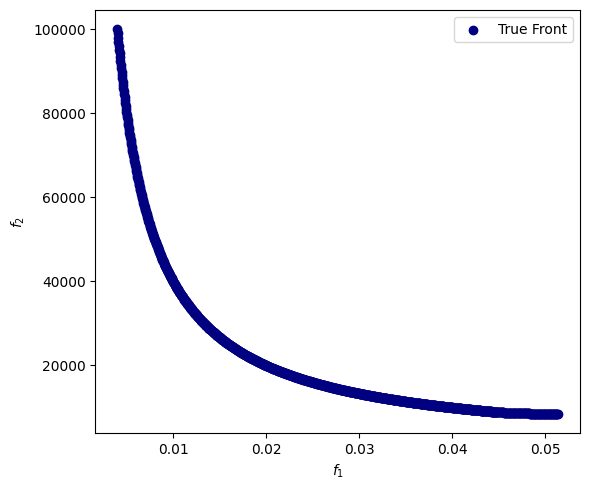

In [2]:
from pymoo.factory import get_problem

problem = get_problem("truss2d")
pf = problem.pareto_front()

fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [3]:
problem.__dict__

{'n_var': 3,
 'n_obj': 2,
 'n_constr': 1,
 'data': {'type_var': numpy.float64},
 'xl': array([0., 0., 1.]),
 'xu': array([0.01, 0.01, 3.  ]),
 'callback': None,
 'check_inconsistencies': True,
 'replace_nan_values_by': inf,
 'exclude_from_serialization': [],
 '_pareto_set': <pymoo.util.cache.Cache at 0x2c0fe01fdc0>,
 '_pareto_front': <pymoo.util.cache.Cache at 0x2c0fe01f820>,
 '_ideal_point': None,
 '_nadir_point': None,
 'Amax': 0.01,
 'Smax': 100000.0}

In [4]:
NGEN = 250
POPSIZE = 100
SEED = 5

In [5]:
%%time

gde3 = GDE3(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), repair="bounce-back",
            survival=RankAndCrowding(crowding_func="cd"))

res_gde3 = minimize(problem,
                    gde3,
                    ('n_gen', NGEN),
                    seed=SEED,
                    save_history=True,
                    verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |     100 |  0.00000E+00 |  3.07107E+04 |  0.045011597 |  0.037115181 |  0.782631941
    2 |     200 |  0.00000E+00 |  0.00000E+00 |  0.038233673 |  0.036260173 |  0.786383217
    3 |     300 |  0.00000E+00 |  0.00000E+00 |  0.031567551 |  0.018335160 |  0.800162059
    4 |     400 |  0.00000E+00 |  0.00000E+00 |  0.026537635 |  0.018352630 |  0.807559307
    5 |     500 |  0.00000E+00 |  0.00000E+00 |  0.024877926 |  0.015471478 |  0.813835559
    6 |     600 |  0.00000E+00 |  0.00000E+00 |  0.022159309 |  0.016440466 |  0.817230770
    7 |     700 |  0.00000E+00 |  0.00000E+00 |  0.019035168 |  0.015967650 |  0.821821866
    8 |     800 |  0.00000E+00 |  0.00000E+00 |  0.015950885 |  0.014681782 |  0.824360381
    9 |     900 |  0.00000E+00 |  0.00000E+00 |  0.015500999 |  0.013616856 |  0.825851936
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |  0.013920230 |  0.011963293 |  0.833208054

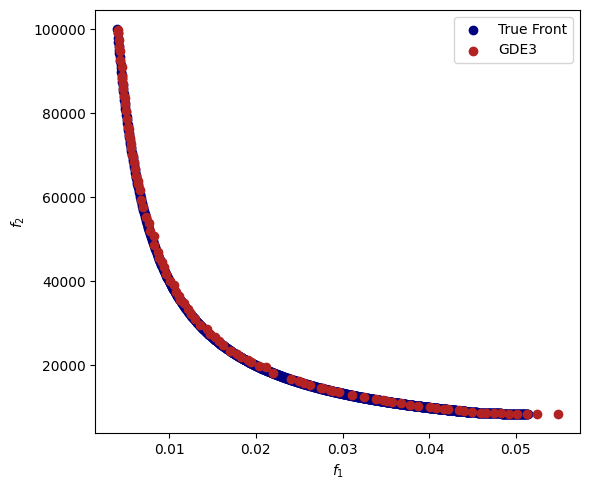

In [6]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [7]:
%%time

gde3p = GDE3(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), repair="bounce-back",
             survival=RankAndCrowding(crowding_func="pcd"))

res_gde3p = minimize(problem,
                     gde3p,
                     ('n_gen', NGEN),
                     seed=SEED,
                     save_history=True,
                     verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |     100 |  0.00000E+00 |  3.07107E+04 |  0.045011597 |  0.037115181 |  0.782631941
    2 |     200 |  0.00000E+00 |  0.00000E+00 |  0.038233673 |  0.036260173 |  0.786383217
    3 |     300 |  0.00000E+00 |  0.00000E+00 |  0.031567551 |  0.018335160 |  0.800162059
    4 |     400 |  0.00000E+00 |  0.00000E+00 |  0.028123061 |  0.019289847 |  0.808117629
    5 |     500 |  0.00000E+00 |  0.00000E+00 |  0.019800448 |  0.015211650 |  0.816754724
    6 |     600 |  0.00000E+00 |  0.00000E+00 |  0.017171404 |  0.014342316 |  0.823715765
    7 |     700 |  0.00000E+00 |  0.00000E+00 |  0.015145391 |  0.012731256 |  0.828736015
    8 |     800 |  0.00000E+00 |  0.00000E+00 |  0.013050191 |  0.011513166 |  0.831456992
    9 |     900 |  0.00000E+00 |  0.00000E+00 |  0.011241781 |  0.009780319 |  0.833144363
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |  0.010858133 |  0.009058280 |  0.833604447

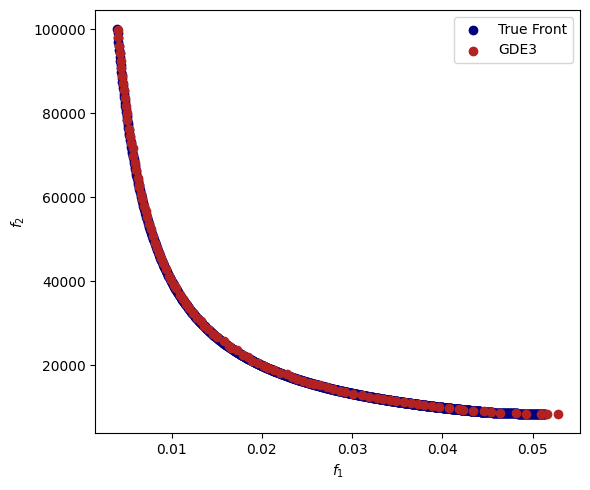

In [8]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3p.F[:, 0], res_gde3p.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [9]:
sp = SpacingIndicator(
    zero_to_one=True,
    ideal=problem.pareto_front().min(axis=0),
    nadir=problem.pareto_front().max(axis=0)
)

The lesser the spacing, the more even the distribution of elements

In [10]:
print("Spacing of normal crowding distances: ", sp.do(res_gde3.F))
print("Spacing of pruned crowding distances: ", sp.do(res_gde3p.F))

Spacing of normal crowding distances:  0.007531202373576977
Spacing of pruned crowding distances:  0.0032956432593306034


In [11]:
%%time

nsga2 = NSGA2(pop_size=POPSIZE, survival=RankAndCrowding(crowding_func="pcd"))

res_nsga2 = minimize(problem,
                     nsga2,
                     ('n_gen', NGEN),
                     seed=SEED,
                     save_history=True,
                     verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |     100 |  0.00000E+00 |  4.80329E+04 |  0.049027957 |  0.030583648 |  0.767317598
    2 |     200 |  0.00000E+00 |  0.00000E+00 |  0.032480459 |  0.027044760 |  0.796232921
    3 |     300 |  0.00000E+00 |  0.00000E+00 |  0.025749439 |  0.024352780 |  0.806199230
    4 |     400 |  0.00000E+00 |  0.00000E+00 |  0.022263394 |  0.024942519 |  0.813805494
    5 |     500 |  0.00000E+00 |  0.00000E+00 |  0.018995495 |  0.019221554 |  0.821704321
    6 |     600 |  0.00000E+00 |  0.00000E+00 |  0.015461488 |  0.015292632 |  0.825636476
    7 |     700 |  0.00000E+00 |  0.00000E+00 |  0.013870636 |  0.018058461 |  0.828551570
    8 |     800 |  0.00000E+00 |  0.00000E+00 |  0.011381688 |  0.015327695 |  0.832504570
    9 |     900 |  0.00000E+00 |  0.00000E+00 |  0.010310459 |  0.012343847 |  0.833923121
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |  0.010073356 |  0.011287942 |  0.835018650

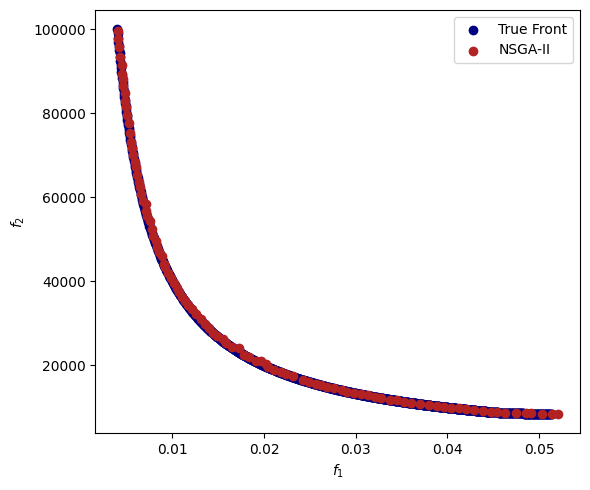

In [12]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsga2.F[:, 0], res_nsga2.F[:, 1], color="firebrick", label="NSGA-II")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [13]:
%%time
nsde = NSDE(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), repair="bounce-back",
            survival=RankAndCrowding(crowding_func="pcd"))
    
res_nsde = minimize(problem,
                    nsde,
                    ('n_gen', NGEN),
                    seed=SEED,
                    save_history=True,
                    verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |     100 |  0.00000E+00 |  3.07107E+04 |  0.045011597 |  0.037115181 |  0.782631941
    2 |     200 |  0.00000E+00 |  0.00000E+00 |  0.038233673 |  0.036260173 |  0.786383217
    3 |     300 |  0.00000E+00 |  0.00000E+00 |  0.029960861 |  0.035379681 |  0.806127059
    4 |     400 |  0.00000E+00 |  0.00000E+00 |  0.023718891 |  0.016280841 |  0.815164095
    5 |     500 |  0.00000E+00 |  0.00000E+00 |  0.017345120 |  0.012818800 |  0.825887428
    6 |     600 |  0.00000E+00 |  0.00000E+00 |  0.015820864 |  0.011848155 |  0.830916312
    7 |     700 |  0.00000E+00 |  0.00000E+00 |  0.014538391 |  0.012900504 |  0.834367075
    8 |     800 |  0.00000E+00 |  0.00000E+00 |  0.012766392 |  0.010722276 |  0.836588595
    9 |     900 |  0.00000E+00 |  0.00000E+00 |  0.011727230 |  0.010257357 |  0.838024639
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |  0.009815366 |  0.009250481 |  0.839906474

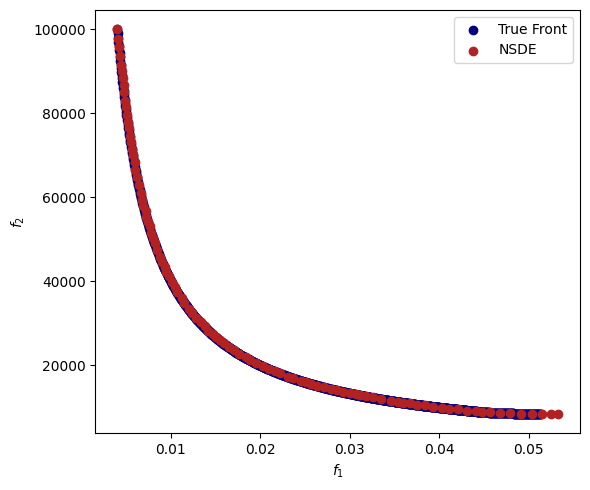

In [14]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsde.F[:, 0], res_nsde.F[:, 1], color="firebrick", label="NSDE")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()